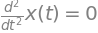

In [1]:
import sympy as sp
sp.init_printing()

# Símbolos
v0, t, g, theta = sp.symbols('v0, t, g, theta')

# Funções
x = sp.Function('x')
y = sp.Function('y')

# Equação x
eqx = sp.Eq(x(t).diff(t,2), 0) # A aceleração no eixo x é zero
eqx


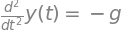

In [2]:
# Equação y
eqy = sp.Eq(y(t).diff(t,2), -g) # A aceleração no eixo y é -g
eqy

In [3]:
# Solução em x
xsol = sp.dsolve(eqx, ics={x(0):0, x(t).diff(t,1).subs(t,0):v0*sp.cos(theta)})
xsol

In [4]:
#Solução em y
ysol = sp.dsolve(eqy, ics={y(0):0, y(t).diff(t,1).subs(t,0):v0*sp.sin(theta)})
ysol

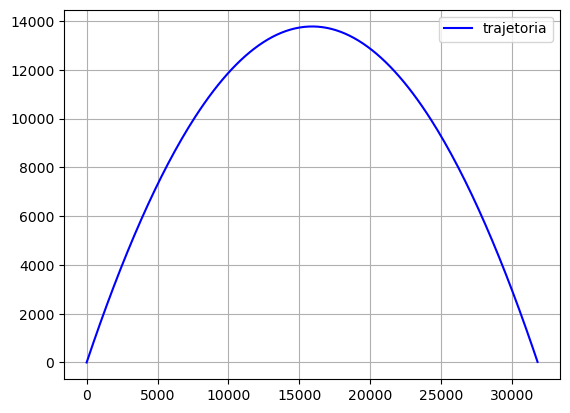

In [5]:
### Lambdificação
import numpy as np
import matplotlib.pyplot as plt

# malha de pontos tempo t
tl = np.linspace(0,106,200)
th = np.pi*2/6
vi = 600.0

x_t = sp.lambdify(t, xsol.rhs.subs({v0:vi, theta:th}), "numpy")

Xp = x_t(tl)

y_t = sp.lambdify(t, ysol.rhs.subs({v0:vi, theta:th, g:9.8}), 'numpy')
Yp = y_t(tl)

plt.plot(Xp,Yp,color='blue',label='trajetoria')
plt.legend()
plt.grid()
plt.show()